In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Загрузка

In [5]:
df = pd.read_csv('death_rates_before.csv')
df.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


## 2. Основные данные

In [6]:
df.shape

(12, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [8]:
df.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [9]:
df.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [10]:
df['clinic'].value_counts()

clinic 2    6
clinic 1    6
Name: clinic, dtype: int64

In [11]:
df[['deaths', 'clinic']].groupby(['clinic']).mean()

,deaths
clinic,
clinic 1,331.500000
clinic 2,115.166667


In [12]:
df[['births', 'clinic']].groupby(['clinic']).mean()

,births
clinic,
clinic 1,3340.333333
clinic 2,2965.166667


<AxesSubplot:>

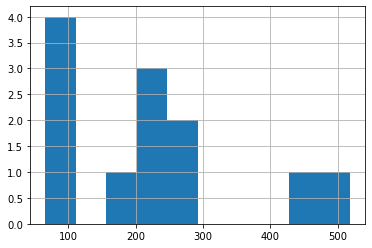

In [13]:
df['deaths'].hist()

## 3. Подготовка для машинного обучения

In [14]:
df.loc[df['clinic'] == 'clinic 1', 'clinic'] = 1
df.loc[df['clinic'] == 'clinic 2', 'clinic'] = 2
df

,year,births,deaths,clinic
0,1841,3036,237,1
1,1842,3287,518,1
2,1843,3060,274,1
3,1844,3157,260,1
4,1845,3492,241,1
5,1846,4010,459,1
6,1841,2442,86,2
7,1842,2659,202,2
8,1843,2739,164,2
9,1844,2956,68,2


## 4. ML

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [16]:
X = df[['births', 'deaths']].values
y = pd.to_numeric(df['clinic']).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
logistic_model = LogisticRegression().fit(X_train, y_train)

In [18]:
tree_model = DecisionTreeClassifier(criterion='gini').fit(X_train, y_train)

In [19]:
svc_model = SVC().fit(X_train, y_train)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 5. Оценка качества

In [21]:
def check_metrics(model):
    print('Accuracy:', accuracy_score(y_test, model.predict(X_test)))
    print('Precision:', precision_score(y_test, model.predict(X_test)))
    print('Recall:', recall_score(y_test, model.predict(X_test)))
    print('F1:', f1_score(y_test, model.predict(X_test)))

In [22]:
check_metrics(logistic_model)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [23]:
check_metrics(tree_model)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [25]:
check_metrics(svc_model)

Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1: 0.5


По результатам исследования, можно сделать вывод, что во второй клинике смерность меньше.